In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('london.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
#переведем в более красивый формат

df.timestamp = pd.to_datetime(df.timestamp)
df.season = df.season.astype(int)
df.is_holiday = df.is_holiday.astype(int)
df.is_weekend = df.is_weekend.astype(int)
df.weather_code = df.weather_code.astype(int)

In [5]:
df['date'] = df.timestamp.dt.date
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04


In [6]:
plt.figure(figsize=(10,7))
#sns.lineplot(x='timestamp', y='cnt', data = df)

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [7]:
#преобразуем данные
df = df.set_index('timestamp')
df = df.sort_index()
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04


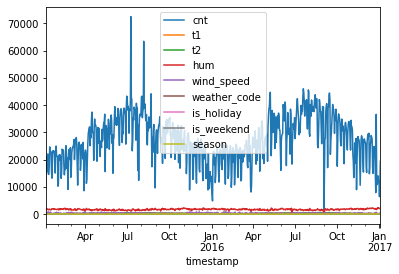

In [11]:
df_count = df.resample(rule='D').sum()
df_count.plot()

In [20]:
#посчитаем скользящее среднее кол-во аренд с окном 3
df_count['rolling_mean_3'] = df_count.cnt.rolling(window=3).mean() #сколз среднее с коном 3 дня
df_count['fact_and_rm_3'] = df_count['cnt'] - df_count['rolling_mean_3'] #разница между фактом и скользящим средним
df_count['std_fact_and_rm_3'] = np.std(df_count.fact_and_rm_3) #станд отклон  разницы

df_count['upper_bound'] = df_count.rolling_mean_3 + 2.576 * df_count.std_fact_and_rm_3 #правая граница 99% ДИ
df_count['lower_bound'] = df_count.rolling_mean_3 - 2.576 * df_count.std_fact_and_rm_3 #левая граница 99% ДИ
df_count.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean_3,fact_and_rm_3,std_fact_and_rm_3,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,,
2016-12-30,11566,78.5,25.5,2368.5,216.0,105,0,0,72,12682.000000,-1116.000000,4558.586641,24424.919188,939.080812
2016-12-31,11424,178.5,121.0,2183.0,319.5,98,0,24,72,12347.333333,-923.333333,4558.586641,24090.252521,604.414146
2017-01-01,6421,168.0,106.5,2122.5,339.0,150,0,24,72,9803.666667,-3382.666667,4558.586641,21546.585854,-1939.252521
2017-01-02,11823,89.5,22.5,1995.5,268.0,29,24,0,72,9889.333333,1933.666667,4558.586641,21632.252521,-1853.585854
2017-01-03,19436,81.5,-15.0,1953.5,454.5,56,0,0,72,12560.000000,6876.000000,4558.586641,24302.919188,817.080812


In [18]:
df_count.query("timestamp == '2015-07-09'")

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean_3,fact_and_rm_3,std_fact_and_rm_3
timestamp,,,,,,,,,,,,
2015-07-09,72504,427.0,421.0,1175.5,311.5,28,0,0,24,50705.0,21799.0,4558.586641


In [22]:
#посмотрим на значения, которые вышли за правую границу доверительного интервала
df_count.query("cnt > upper_bound").sort_values('cnt', ascending=False) 

#2015-07-09 максимальный скачок аренды велосипедов в лондоне из-за забастовки в метро

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean_3,fact_and_rm_3,std_fact_and_rm_3,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,,
2015-07-09,72504,427.0,421.0,1175.5,311.5,28,0,0,24,50705.000000,21799.000000,4558.586641,62447.919188,38962.080812
2015-08-06,63468,466.5,466.5,1625.0,357.5,50,0,0,24,46627.333333,16840.666667,4558.586641,58370.252521,34884.414146
2016-12-25,36653,300.0,300.0,1906.0,664.0,87,0,24,72,19650.666667,17002.333333,4558.586641,31393.585854,7907.747479
2016-09-04,27512,452.5,452.5,1676.5,561.5,71,0,24,48,14259.000000,13253.000000,4558.586641,26001.919188,2516.080812


In [24]:
#посмотрим на значения, которые вышли за левую границу доверительного интервала
df_count.query("cnt < lower_bound").sort_values('cnt') #скорее всего 2016-09-02 произошла ошибка в сборе данных

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean_3,fact_and_rm_3,std_fact_and_rm_3,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,,
2016-09-02,0,0.0,0.0,0.0,0.0,0,0,0,0,26086.333333,-26086.333333,4558.586641,37829.252521,14343.414146
2015-11-14,8898,270.0,235.0,1951.0,560.0,105,0,24,48,21037.333333,-12139.333333,4558.586641,32780.252521,9294.414146
2016-11-12,8990,214.0,180.0,1976.0,247.5,108,0,23,46,20878.000000,-11888.000000,4558.586641,32620.919188,9135.080812
2015-05-14,15609,237.5,189.5,2039.0,513.0,118,0,0,0,28709.333333,-13100.333333,4558.586641,40452.252521,16966.414146
2015-07-24,16034,380.5,380.5,1810.0,275.0,108,0,0,24,31013.666667,-14979.666667,4558.586641,42756.585854,19270.747479
2016-09-10,17080,460.0,460.0,1932.0,392.0,89,0,24,48,31262.000000,-14182.000000,4558.586641,43004.919188,19519.080812
2015-08-24,17400,380.0,380.0,2099.0,321.0,126,0,0,24,29529.333333,-12129.333333,4558.586641,41272.252521,17786.414146
2016-09-16,21967,416.0,416.0,1900.5,416.0,115,0,0,48,36193.333333,-14226.333333,4558.586641,47936.252521,24450.414146
2015-07-12,23240,444.5,444.5,1811.5,520.5,80,0,24,24,36036.666667,-12796.666667,4558.586641,47779.585854,24293.747479
